# Book Rating Prediction Project - UE Python Machine Learning Labs - DSTI 

## Part 1: Importing libraries

In [49]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

## Part 2: Cleaning Data

### Overview:

The original data source file is 'book.csv'. This file has 11 128 lines.

After having a quick review, we see that: 

* There is glitch of data in 4 lines, presumabably because there is a comma in the author cells, making Excel to separate the cell into 2 columns
  &rarr; Since the problem only occurs in 4 lines, we correct this fault directly on the csv file and save it as a new version called 'books_corrected.csv'
* In the language_code column, there are many codes for English such as eng, en-US, en-CA, en-GB &rarr; Modify all these codes to have only one code 'eng'

### Import dataset:

In [171]:
books = pd.read_csv('../Dataset/books_corrected.csv', header = 0)

### Replace values in Language column:

In [51]:
column_name = books.columns
print(column_name)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [180]:
books['language_code'] = books['language_code'].replace(['en-US', 'en-GB', 'en-CA'], ['eng', 'eng', 'eng'])

### Rename the column '  num_pages' to 'num_pages':

In [172]:
books.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

### Convert 'isbn13' column to object (string) data type:

In [54]:
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [173]:
books['isbn13'] = books['isbn13'].astype(str)

### Normalize 'publication_date' column:

In [174]:
# Convert 'publication_date' to string
books['publication_date'] = books['publication_date'].astype(str)

# Add leading zero to month part if it's a single-digit number
books['publication_date'] = books['publication_date'].apply(lambda date: '0' + date if len(date.split('/')[0]) == 1 else date)

# Convert 'publication_date' to datetime format with dayfirst=True
books['publication_date'] = pd.to_datetime(books['publication_date'], dayfirst=True, errors='coerce')

C:\Users\thuth\AppData\Local\Temp\ipykernel_12616\138762269.py:8: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  books['publication_date'] = pd.to_datetime(books['publication_date'], dayfirst=True, errors='coerce')


In [8]:
print("Rows with missing or invalid dates:")
print(books[books['publication_date'].isna()])

Rows with missing or invalid dates:
       bookID                                              title  \
8180    31373  In Pursuit of the Proper Sinner (Inspector Lyn...   
11098   45531         Montaillou  village occitan de 1294 à 1324   

                                               authors  average_rating  \
8180                                 Elizabeth  George            4.10   
11098  Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

             isbn           isbn13 language_code  num_pages  ratings_count  \
8180    553575104  9780000000000.0           eng        718          10608   
11098  2070323285  9780000000000.0           fre        640             15   

       text_reviews_count publication_date       publisher  
8180                  295              NaT    Bantam Books  
11098                   2              NaT  Folio histoire  


The original publication date of ID 8180 and ID 11098 is 11/31/2000 and 6/31/1982 respectively. We will drop these values because there is no 31st day in November and June.

In [175]:
# Convert 'publication_date' back to the desired 'mm/dd/yyyy' string format
books['publication_date'] = books['publication_date'].dt.strftime('%m/%d/%Y')

# Drop rows with invalid dates (errors='coerce' will set invalid dates to NaT)
books.dropna(subset=['publication_date'], inplace=True)

## Part 3: Exploratory Data Analysis

In [10]:
books.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
count,11125.000000,11125.000000,11125.000000,1.112500e+04,11125.000000
mean,21307.857348,3.933613,336.315326,1.793868e+04,541.925213
std,13092.173318,0.352473,241.104641,1.124894e+05,2576.402036
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10285.000000,3.770000,192.000000,1.040000e+02,9.000000
50%,20264.000000,3.960000,299.000000,7.450000e+02,46.000000
75%,32104.000000,4.140000,416.000000,4.991000e+03,237.000000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000


In [11]:
# Verify if there is null values

books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [12]:
# Verify if there is NA values

books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [13]:
books['language_code'].nunique()

24

In [14]:
books['publisher'].nunique()

2291

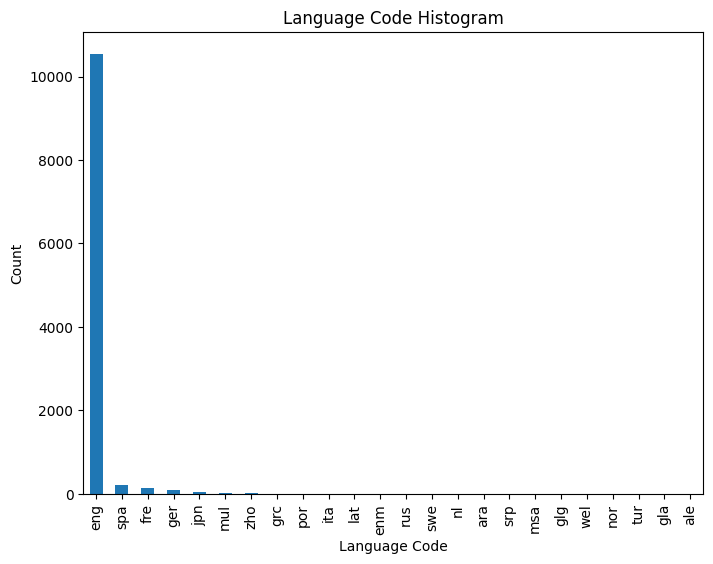

In [75]:
# Histogram of language_code

plt.figure(figsize=(8, 6)) 
books['language_code'].value_counts().plot(kind='bar')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.title('Language Code Histogram')
plt.show()

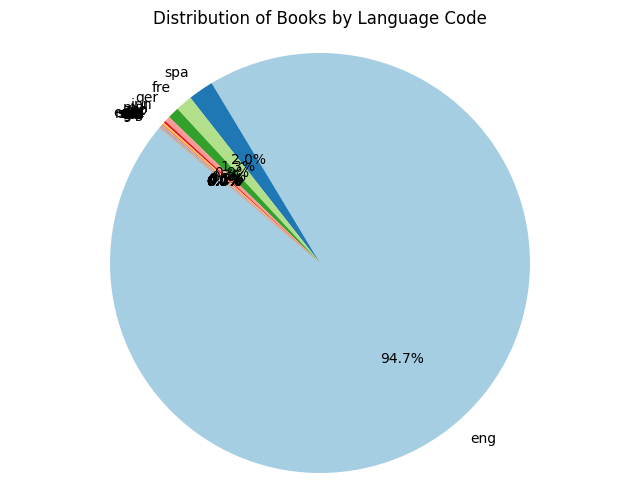

In [15]:
# Calculate the counts for each language code
language_counts = books['language_code'].value_counts()

# Create a pie chart for the 'language_code' column
plt.figure(figsize=(8, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Books by Language Code')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [76]:
# Top 5 authors with the most books
top_authors_most_books = books['authors'].value_counts().nlargest(5)

# Top 5 authors with the least books
top_authors_least_books = books['authors'].value_counts().nsmallest(5)

print("Top 5 authors with the most books:")
print(top_authors_most_books)

print("\nTop 5 authors with the least books:")
print(top_authors_least_books)

Top 5 authors with the most books:
authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Name: count, dtype: int64

Top 5 authors with the least books:
authors
Dave Eggers/T. Coraghessan Boyle/Adam Golaski/Sean Casey/Brendan Connell    1
Theodore Sturgeon/Paul Williams/Kurt Vonnegut Jr.                           1
Amanda Eyre Ward                                                            1
Paul Schrader                                                               1
Margaret Cho                                                                1
Name: count, dtype: int64


In [32]:
# Top 5 books with the highest ratings
top_books_highest_ratings = books.nlargest(5, 'average_rating')

# Top 5 books with the worst ratings
top_books_worst_ratings = books.nsmallest(5, 'average_rating')

print("Top 5 books with the highest ratings:")
print(top_books_highest_ratings)

print("\nTop 5 books with the worst ratings:")
print(top_books_worst_ratings)

Top 5 books with the highest ratings:
      bookID                                              title  \
624     2034  Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
786     2560                  Willem de Kooning: Late Paintings   
855     2843  Literature Circle Guide: Bridge to Terabithia:...   
1243    4287  Middlesex Borough (Images of America: New Jersey)   
4126   14741  Zone of the Enders: The 2nd Runner Official St...   

                                   authors  average_rating        isbn  \
624    Aristophanes/F.W. Hall/W.M. Geldart             5.0   198145047   
786        Julie Sylvester/David Sylvester             5.0  382960226X   
855                         Tara MacCarthy             5.0   439271711   
1243  Middlesex Borough Heritage Committee             5.0   738511676   
4126                            Tim Bogenn             5.0   744002354   

               isbn13 language_code    num_pages  ratings_count  \
624   9780000000000.0           grc          36

In [176]:
# Extract year from 'publication_date' and create a new 'year' column
books['publication_year'] = books['publication_date'].apply(lambda date: date.split('/')[2])

In [79]:
earliest_year = books['publication_year'].min()
latest_year = books['publication_year'].max()

print("Earliest Year:", earliest_year)
print("Latest Year:", latest_year)

Earliest Year: 1900
Latest Year: 2020


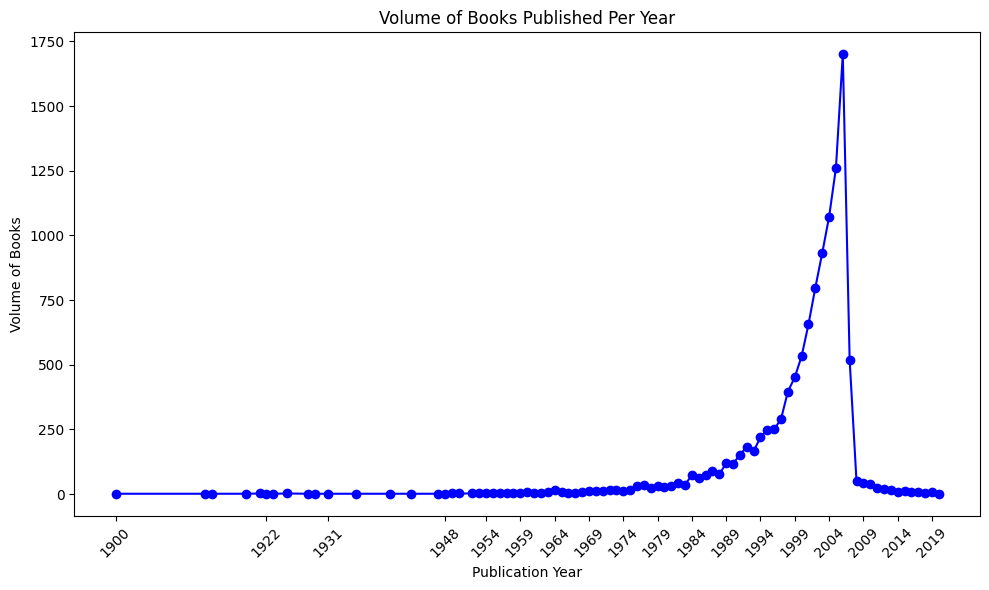

In [133]:
books['publication_year'] = pd.to_numeric(books['publication_year'])

# Group by 'publication_year' and count the number of books in each year
books_per_year = books.groupby('publication_year').size()

# Create a line chart to visualize the volumes of books per year
plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Publication Year')
plt.ylabel('Volume of Books')
plt.title('Volume of Books Published Per Year')
plt.xticks(books_per_year.index[::5], rotation=45)  # Set step size to display every five years
plt.tight_layout()
plt.show()

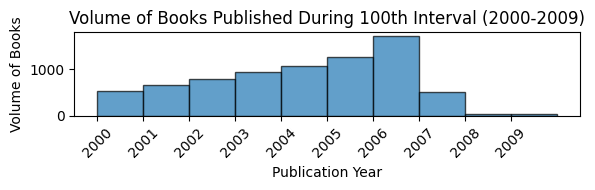

In [108]:
# Filter data for the 100th interval (2000-2009)
interval_100 = books[(books['publication_year'] >= 2000) & (books['publication_year'] <= 2009)]

# Create a histogram to visualize the volume of books in the 100th interval (2000-2009)
plt.figure(figsize=(6, 2))
plt.hist(interval_100['publication_year'], bins=10, range=(2000, 2010), edgecolor='black', alpha=0.7)
plt.xlabel('Publication Year')
plt.ylabel('Volume of Books')
plt.title('Volume of Books Published During 100th Interval (2000-2009)')
plt.xticks(range(2000, 2010), rotation=45)
plt.tight_layout()
plt.show()

In [87]:
# Filter data for the year 2020
books_2020 = books[books['publication_year'] == 2020]

# Count the number of books published in 2020
num_books_2020 = len(books_2020)

print("Number of books published in 2020:", num_books_2020)

Number of books published in 2020: 1


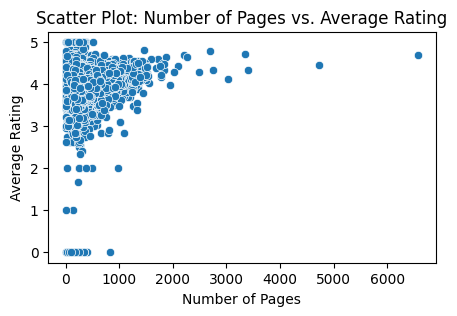

In [104]:
# Correlation between 'num_pages' and 'average_rating'

plt.figure(figsize=(5, 3))
sns.scatterplot(data=books, x='num_pages', y='average_rating')
plt.title('Scatter Plot: Number of Pages vs. Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()

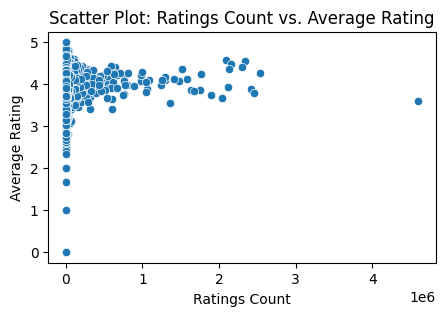

In [16]:
# Correlation between 'ratings_count' and 'average_rating'

plt.figure(figsize=(5, 3))
sns.scatterplot(data=books, x='ratings_count', y='average_rating')
plt.title('Scatter Plot: Ratings Count vs. Average Rating')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.show()

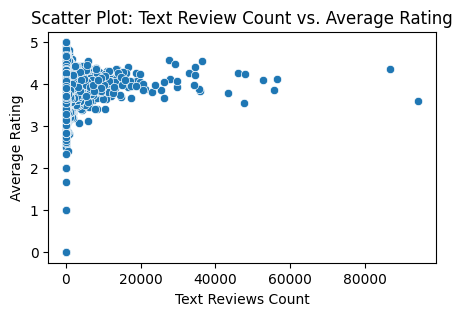

In [17]:
# Correlation between 'text_reviews_count' and 'average_rating'

plt.figure(figsize=(5, 3))
sns.scatterplot(data=books, x='text_reviews_count', y='average_rating')
plt.title('Scatter Plot: Text Review Count vs. Average Rating')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')
plt.show()

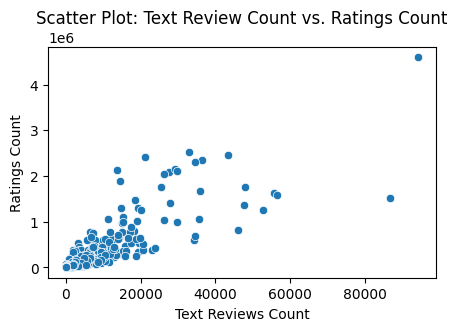

In [18]:
# Correlation between 'text_reviews_count' and 'ratings_count'

plt.figure(figsize=(5, 3))
sns.scatterplot(data=books, x='text_reviews_count', y='ratings_count')
plt.title('Scatter Plot: Text Review Count vs. Ratings Count')
plt.xlabel('Text Reviews Count')
plt.ylabel('Ratings Count')
plt.show()

<Axes: xlabel='publication_year', ylabel='ratings_count'>

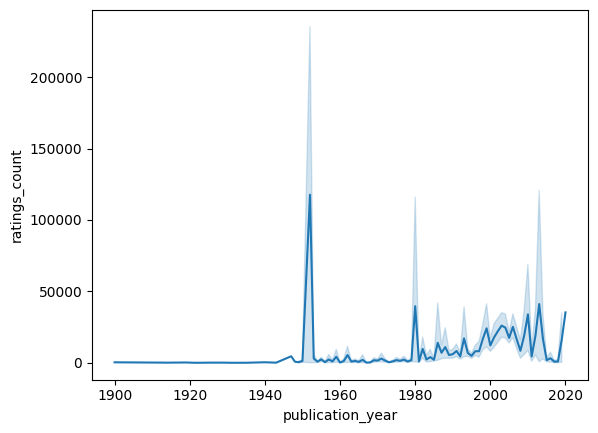

In [107]:
sns.lineplot(data=books, x='publication_year', y='ratings_count')

In [114]:
# Get the count of distinct authors
distinct_authors_count = books['authors'].nunique()

# Get the count of distinct publishers
distinct_publishers_count = books['publisher'].nunique()

print("Count of distinct authors:", distinct_authors_count)
print("Count of distinct publishers:", distinct_publishers_count)

Count of distinct authors: 6642
Count of distinct publishers: 2291


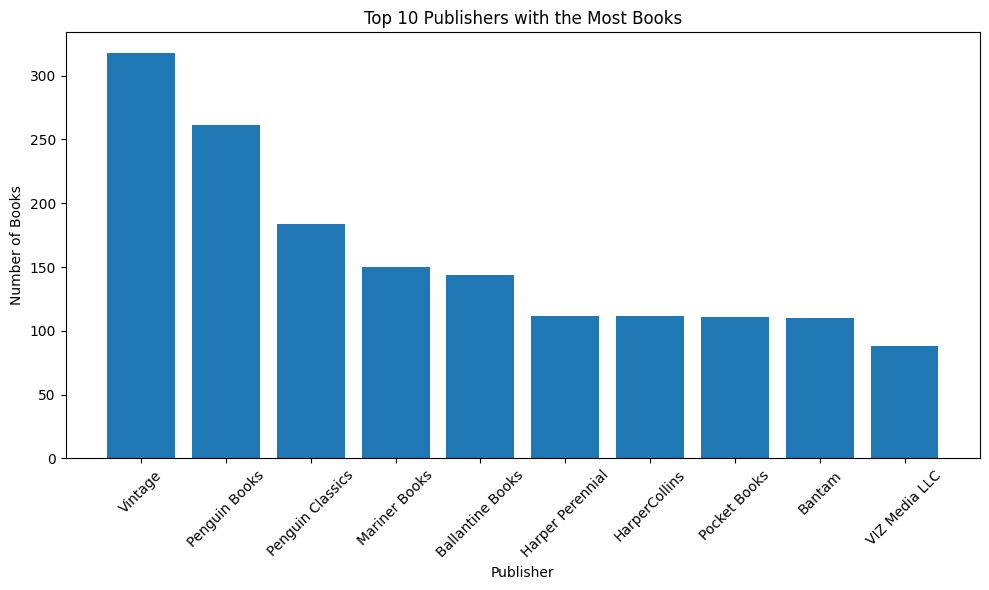

In [115]:
# Calculate the count of books for each publisher
publisher_counts = books['publisher'].value_counts()

# Sort the publishers based on book count in descending order
top_publishers = publisher_counts.head(10)

# Create a histogram for the top 10 publishers with the most books
plt.figure(figsize=(10, 6))
plt.bar(top_publishers.index, top_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 10 Publishers with the Most Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

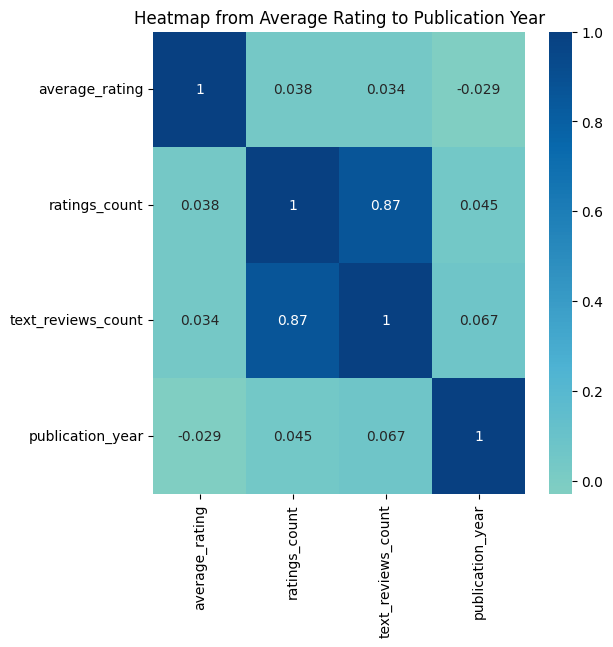

In [135]:
# Select data for the heatmap
heatmap_data = books[['average_rating', 'ratings_count', 'text_reviews_count', 'publication_year']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap from 'average_rating' to 'publication_year'
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', center=0)
plt.title('Heatmap from Average Rating to Publication Year')
plt.show()

## Part 4: Feature Engineering

### Option 1: Add number of authors feature

In [99]:
books['authors'] = books['authors'].astype(str)

In [169]:
# Count of authors

books['num_authors'] = books['authors'].apply(lambda x: len(x.split('/')))

### Add Publication Year feature

Already done above

### Option 2: Add numer of books by author

In [183]:
# Split authors and duplicate rows
new_rows = []
for index, row in books.iterrows():
    authors = row['authors'].split('/')
    for author in authors:
        new_row = row.copy()
        new_row['authors'] = author
        new_rows.append(new_row)

# Create a new DataFrame
books_encoded = pd.DataFrame(new_rows)

# Reset index
books_encoded.reset_index(drop=True, inplace=True)

In [184]:
# Calculate the number of books per author
books['num_books_per_author'] = books.groupby('authors')['bookID'].transform('count')

## Part 5: Book Rating Prediction Model

### Create is_english varaible

In [179]:
# Create a new column 'is_english'
books['is_english'] = 0

# Set 'is_english' to 1 for English books
books.loc[books['language_code'] == 'eng', 'is_english'] = 1

# Drop the original 'language_code' column if no longer needed
# books.drop('language_code', axis=1, inplace=True)

In [188]:
# Separate features and target variable
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_year', 'is_english'
           , 'num_books_per_author']
target = 'average_rating'

X = books[features]
y = books[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print("Linear Regression - MSE:", mse_lr, "R-squared:", r2_lr)
print("Decision Tree - MSE:", mse_dt, "R-squared:", r2_dt)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)

Linear Regression - MSE: 0.10845581969489901 R-squared: 0.04122550553037496
Decision Tree - MSE: 0.20793159550561796 R-squared: -0.8381633270209645
Random Forest - MSE: 0.09430441613028963 R-squared: 0.1663271813727839


## Improvement

In [90]:
from sklearn.preprocessing import LabelEncoder

In [189]:
# Label encoding for 'publisher'
le = LabelEncoder()

books['publisher_encoded'] = le.fit_transform(books['publisher'])

In [191]:
# Separate features and target variable
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_year', 'num_books_per_author', 'is_english', 
            'publisher_encoded']
target = 'average_rating'

X = books[features]
y = books[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print("Linear Regression - MSE:", mse_lr, "R-squared:", r2_lr)
print("Decision Tree - MSE:", mse_dt, "R-squared:", r2_dt)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)

Linear Regression - MSE: 0.10825349179161008 R-squared: 0.04301413092400219
Decision Tree - MSE: 0.172896404494382 R-squared: -0.5284441469443202
Random Forest - MSE: 0.08661024343061796 R-squared: 0.23434544504219446


### One hot encoder for language_code

In [117]:
# Create a copy of the 'books' DataFrame
books_copy = books.copy()

books_copy = pd.get_dummies(books_copy, columns=["language_code"])

books_copy.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'num_authors', 'is_english', 'publisher_encoded',
       'publication_year', 'language_code_ale', 'language_code_ara',
       'language_code_eng', 'language_code_enm', 'language_code_fre',
       'language_code_ger', 'language_code_gla', 'language_code_glg',
       'language_code_grc', 'language_code_ita', 'language_code_jpn',
       'language_code_lat', 'language_code_msa', 'language_code_mul',
       'language_code_nl', 'language_code_nor', 'language_code_por',
       'language_code_rus', 'language_code_spa', 'language_code_srp',
       'language_code_swe', 'language_code_tur', 'language_code_wel',
       'language_code_zho'],
      dtype='object')

In [133]:
# Separate features and target variable
X = books_copy.drop(columns=['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'publication_date', 'publisher', 'is_english'])
y = books_copy['average_rating']

In [134]:
X['publication_year'] = pd.to_numeric(X['publication_year'], errors='coerce')

In [136]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print("Decision Tree - MSE:", mse_dt, "R-squared:", r2_dt)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)

Decision Tree - MSE: 0.1907658131176999 R-squared: -0.5771277824353085
Random Forest - MSE: 0.0971261634366577 R-squared: 0.1970239936922289


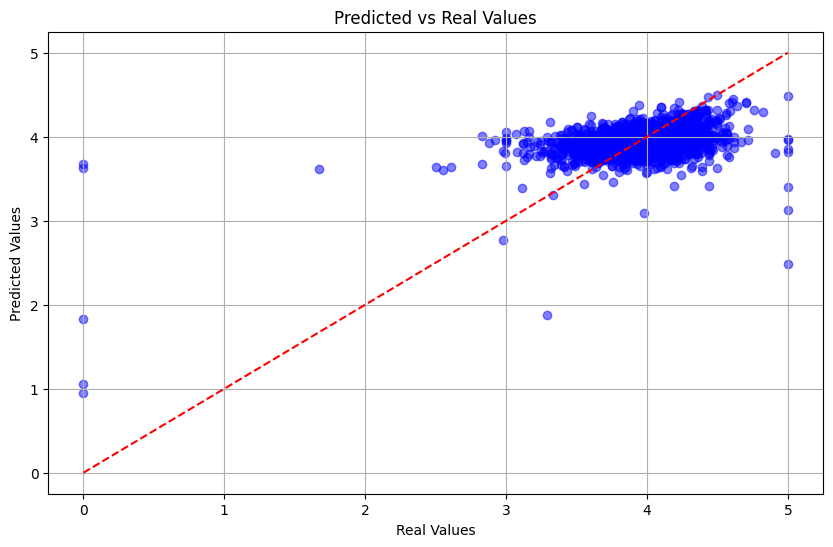

In [142]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.title('Predicted vs Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference
x = np.linspace(min(real_values), max(real_values), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### SMOTE to correct English bias in language_code

In [73]:
pip install imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     -----                                   30.7/235.6 kB 1.3 MB/s eta 0:00:01
     ------------                          81.9/235.6 kB 919.0 kB/s eta 0:00:01
     --------------------------             163.8/235.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\thuth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

### Weighted Loss Function

In [144]:
# Create sample weights based on language_code_eng
# Assign higher weights to non-English languages, and lower weight to English
sample_weights = np.where(X['language_code_eng'] == 1, 0.5, 2)

# Split the data into train and test sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, sample_weights, test_size=0.2, random_state=42
)

# Train Random Forest with sample weights
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train, sample_weight=weights_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest using weighted mean squared error
mse_rf = np.sum(weights_test * (y_test - y_pred_rf)**2) / np.sum(weights_test)
print("Random Forest Weighted MSE:", mse_rf)

# Train Decision Tree with sample weights
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train, sample_weight=weights_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree using weighted mean squared error
mse_dt = np.sum(weights_test * (y_test - y_pred_dt)**2) / np.sum(weights_test)
print("Decision Tree Weighted MSE:", mse_dt)

Random Forest Weighted MSE: 0.10410395146713618
Decision Tree Weighted MSE: 0.21415970266040688


### Add books per year

In [193]:
# Calculate the number of books per year
books['num_books_per_year'] = books.groupby('publication_year')['bookID'].transform('count')
# Display the updated DataFrame
books.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,is_english,num_books_per_year,num_books_per_author,publisher_encoded
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780000000000.0,eng,652,2095690,27591,09/16/2006,Scholastic Inc.,2006,1,1700,6,1779
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780000000000.0,eng,870,2153167,29221,01/09/2004,Scholastic Inc.,2004,1,1071,6,1779


In [192]:
# Separate features and target variable
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_year', 'num_books_per_author', 'is_english', 
            'publisher_encoded', 'num_books_per_year']
target = 'average_rating'

X = books[features]
y = books[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print("Linear Regression - MSE:", mse_lr, "R-squared:", r2_lr)
print("Decision Tree - MSE:", mse_dt, "R-squared:", r2_dt)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)

Linear Regression - MSE: 0.10826394943890665 R-squared: 0.04292168290665899
Decision Tree - MSE: 0.17935923595505618 R-squared: -0.5855770696771121
Random Forest - MSE: 0.08886808387618604 R-squared: 0.2143856140448135


## Part 6: Model deployment

https://share.streamlit.io/